In [1]:
from sqlalchemy import create_engine
from sqlalchemy import create_engine
import pandas as pd    
import matplotlib.pyplot as plt

## Class to make connection to local database.
It uses 
* ` Username `

* ` Password `
* ` Database `
as input.

In [2]:
class db_con:
 def open_local_db(self,**kwargs):
       
    # Postgres username, password, and database name
    POSTGRES_ADDRESS = '127.0.0.1' ## INSERT YOUR DB ADDRESS IF IT'S NOT ON PANOPLY
    POSTGRES_PORT = '5432'
    POSTGRES_USERNAME = kwargs.get('POSTGRES_USERNAME') ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
    POSTGRES_PASSWORD =kwargs.get('POSTGRES_PASSWORD')## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD
    POSTGRES_DBNAME = kwargs.get('POSTGRES_DBNAME') ## CHANGE THIS TO YOUR DATABASE NAME
    # A long string that contains the necessary Postgres login information
    postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME,password=POSTGRES_PASSWORD,ipaddress=POSTGRES_ADDRESS,port=POSTGRES_PORT,dbname=POSTGRES_DBNAME))
    # Create the connection
    cnx = create_engine(postgres_str)
    return cnx

### Dictionary for class parameters.

In [3]:
kwargs = {"POSTGRES_USERNAME" : "postgres", "POSTGRES_PASSWORD" : "root", "POSTGRES_DBNAME" : "moodle"}

### Database connection.

In [4]:
db=db_con()
moodle=db.open_local_db(**kwargs)

### Count of log events per user for the following verbs

In [57]:
verbs_count=pd.read_sql_query('''SELECT userid, action,count(action) AS Count FROM mdl_logstore_standard_log GROUP BY action ,userid ORDER BY userid  ;''', moodle)
verbs_count.head(10)

,userid,action,count
0,-10,failed,1
1,-1,graded,2170
2,0,sent,846
3,0,updated,649
4,0,viewed,5305
5,0,failed,457
6,1,loggedin,1
7,1,viewed,2
8,2,loggedinas,6
9,2,downloaded,1


### Also another better implimentation

In [60]:
pd.read_sql_query('''select userid, sum(case when action = 'viewed' then 1 else 0 end) as viewed,sum(case when action = 'uploaded' then 1 else 0 end) as uploaded ,sum(case when action = 'updated' then 1 else 0 end) as updated,sum(case when action = 'answered' then 1 else 0 end) as answered ,sum(case when action = 'abandoned' then 1 else 0 end) as abandoned, sum(case when action = 'submitted' then 1 else 0 end) as Submitted, sum(case when action = 'searched' then 1 else 0 end) as searched, sum(case when action = 'attempted' then 1 else 0 end) as attempted from mdl_logstore_standard_log group by userid;''', moodle).head(10)

,userid,viewed,uploaded,updated,answered,abandoned,submitted,searched,attempted
0,251,72,0,1,0,0,0,0,0
1,887,18,0,1,0,0,0,0,0
2,264,85,0,1,0,0,0,0,0
3,802,16,0,1,0,0,0,0,0
4,496,12,0,0,0,0,0,0,0
5,455,14,0,0,0,0,0,0,0
6,630,14,0,1,0,0,0,0,0
7,209,185,0,9,1,0,4,0,0
8,276,72,0,0,0,0,0,0,0
9,606,12,0,0,0,0,0,0,0


### Plot Sample Users Activity

In [65]:
verbs_count.groupby(['userid']).sum()
verbs_count['userid'] = verbs_count.index

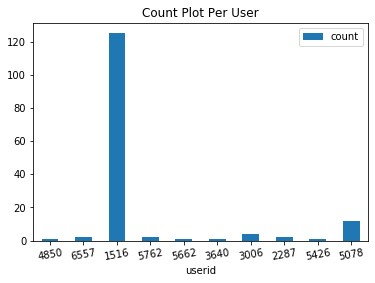

In [68]:
verbs_count.sample(10).plot.bar(x="userid", y="count",stacked=True,rot=10, title="Count Plot Per User");

### Overall grade

In [6]:
pd.read_sql_query('''SELECT userid AS USER_ID, sum(finalgrade) AS Grade FROM mdl_grade_grades GROUP BY userid ORDER BY userid ;''', moodle).head(10)

,user_id,grade
0,2,NaN
1,3,200.00000
2,5,400.66666
3,7,200.00000
4,9,636.00000
5,12,200.00000
6,13,200.00000
7,14,200.00000
8,15,200.00000
9,16,218.66666


### Forum Posts

In [7]:
pd.read_sql_query('''SELECT COUNT(*) FROM mdl_forum_posts ;''', moodle)

,count
0,131


# ==============================================================
##                     SQL Script 
# ==============================================================

#### The number of tables 

In [39]:
pd.read_sql_query('''select count(*) from information_schema.tables where table_schema = 'public';''', moodle)

,count
0,448


#### The number of records in each of the tables given in the MIT section

In [ ]:
pd.read_sql_query('''select count(*) from information_schema.tables where table_schema = 'public';''', moodle)

#### Number of quiz submissions by hour of day

In [38]:
pd.read_sql_query('''select count(id) AS Number_of_quizes, EXTRACT(HOUR FROM to_timestamp(timecreated)) AS Hour_of_day from mdl_logstore_standard_log where action='submitted' AND component='mod_quiz' group by EXTRACT(HOUR FROM to_timestamp(timecreated));''', moodle).head(10)


,number_of_quizes,hour_of_day
0,46,10.0
1,26,0.0
2,57,20.0
3,46,22.0
4,68,17.0
5,53,23.0
6,88,13.0
7,95,12.0
8,90,15.0
9,14,5.0


#### Count of log events per user for the following verbs

In [59]:
pd.read_sql_query('''select userid, sum(case when action = 'viewed' then 1 else 0 end) as viewed,sum(case when action = 'uploaded' then 1 else 0 end) as uploaded ,sum(case when action = 'updated' then 1 else 0 end) as updated,sum(case when action = 'answered' then 1 else 0 end) as answered ,sum(case when action = 'abandoned' then 1 else 0 end) as abandoned, sum(case when action = 'submitted' then 1 else 0 end) as Submitted, sum(case when action = 'searched' then 1 else 0 end) as searched, sum(case when action = 'attempted' then 1 else 0 end) as attempted from mdl_logstore_standard_log group by userid;''', moodle).head(10)

,userid,viewed,uploaded,updated,answered,abandoned,submitted,searched,attempted
0,251,72,0,1,0,0,0,0,0
1,887,18,0,1,0,0,0,0,0
2,264,85,0,1,0,0,0,0,0
3,802,16,0,1,0,0,0,0,0
4,496,12,0,0,0,0,0,0,0
5,455,14,0,0,0,0,0,0,0
6,630,14,0,1,0,0,0,0,0
7,209,185,0,9,1,0,4,0,0
8,276,72,0,0,0,0,0,0,0
9,606,12,0,0,0,0,0,0,0
